In [20]:
import numpy as np
import tensorflow as tf
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report

In [2]:
df1 = pd.read_excel("CTG.xls",0)
df2 = pd.read_excel("CTG.xls",1)
df3 = pd.read_excel("CTG.xls",2)

Precision, Recall, Specificity, etc.
> mcm = multilabel_confusion_matrix(y_true, y_pred)
> tn = mcm[:, 0, 0]
> tp = mcm[:, 1, 1]
> fn = mcm[:, 1, 0]
> fp = mcm[:, 0, 1]
> tp / (tp + fn)
> array([1. , 0.5, 0. ])

In [3]:
df3.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [4]:
X = df3[['LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency','NSP']]

In [5]:
X = X.dropna()

In [6]:
y = X['NSP']
X = X.drop(['NSP'],axis=1)

EDA

In [26]:
y.value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

In [7]:
import seaborn as sns

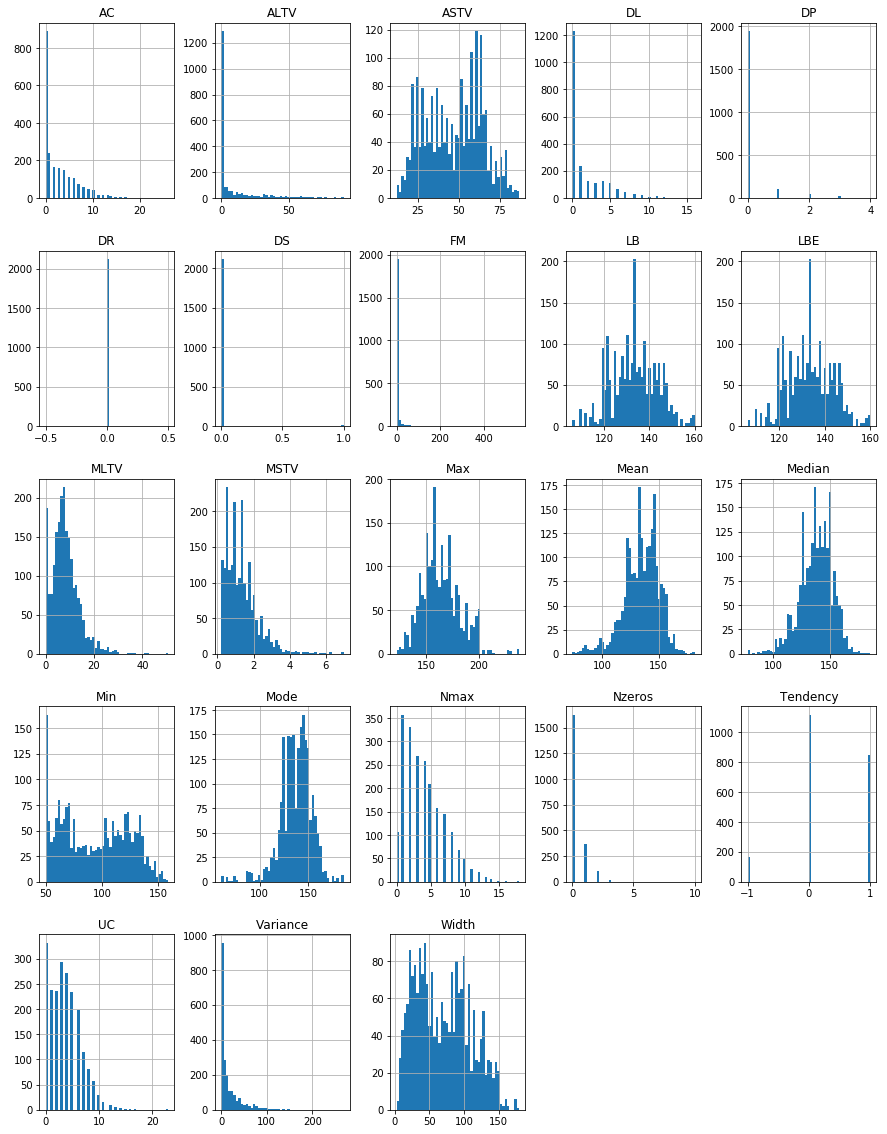

In [8]:
X.hist(bins = 50, figsize=(15,20))
plt.show()

Scaling columns

In [9]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaled_df = scaler.transform(X)
scaled_df = pd.DataFrame(scaled_df)

Use logistic regression to build a classifier to determine the fetal state (3 states).

Split Train test data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

Model Training

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

/Users/shah.peace/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/shah.peace/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [12]:
y_pred = model.predict(X_test)

In [13]:
cnf_matrix = confusion_matrix(y_test,y_pred)
print(cnf_matrix)

[[319  13   1]
 [ 21  36   7]
 [  2   5  22]]


In [14]:
score = lr.score(X_test, y_test)
print(score)

0.8849765258215962


In [19]:
prec_score = precision_score(y_test,y_pred,average='macro')
print(prec_score)

0.7775828460038986


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       333
         2.0       0.67      0.56      0.61        64
         3.0       0.73      0.76      0.75        29

   micro avg       0.88      0.88      0.88       426
   macro avg       0.78      0.76      0.77       426
weighted avg       0.88      0.88      0.88       426



Confusion Matrix

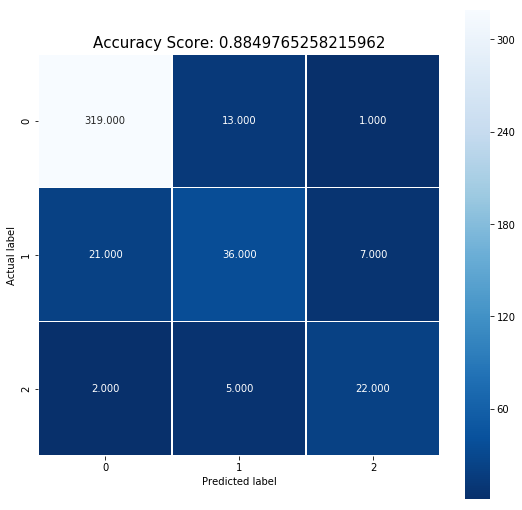

In [15]:
%matplotlib inline
plt.figure(figsize=(9,9))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [16]:
rec_score = recall_score(y_test,y_pred,average='micro')
print(rec_score)

0.8849765258215962


In [17]:
cnf_matrix

array([[319,  13,   1],
       [ 21,  36,   7],
       [  2,   5,  22]])

In [29]:
cnf_matrix[0][1]

13

In [42]:
for i in np.arange(3):
    j = i+1
    if j>2:
        j = j-3
    k = i+2
    if k>2:
        k = k-3
    TP[i] = cnf_matrix[i][i]
    FP[i] = cnf_matrix[j][i]+cnf_matrix[k][i]
    TN[i] = cnf_matrix[j][j] + cnf_matrix[j][k] + cnf_matrix[k][j] + cnf_matrix[k][k]
    FN[i] = cnf_matrix[i][j] + cnf_matrix[i][k]

In [44]:
accuracy = (TP+TN) / (TP+FN+FP+TN)
print(accuracy)

[[0.91314554]
 [0.89201878]
 [0.96478873]]


In [45]:
recall = TP/(TP+FN)
print(recall)

[[0.95795796]
 [0.5625    ]
 [0.75862069]]


In [46]:
precision = TP/(TP+FP)
print(precision)

[[0.93274854]
 [0.66666667]
 [0.73333333]]


#### (b) Advantages / Disadvantages

#### (d) If the data was imbalanced (more data from one class than the other), what would you do?